In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


In [7]:
df.shape

(158, 12)

In [12]:
df.isnull(). sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

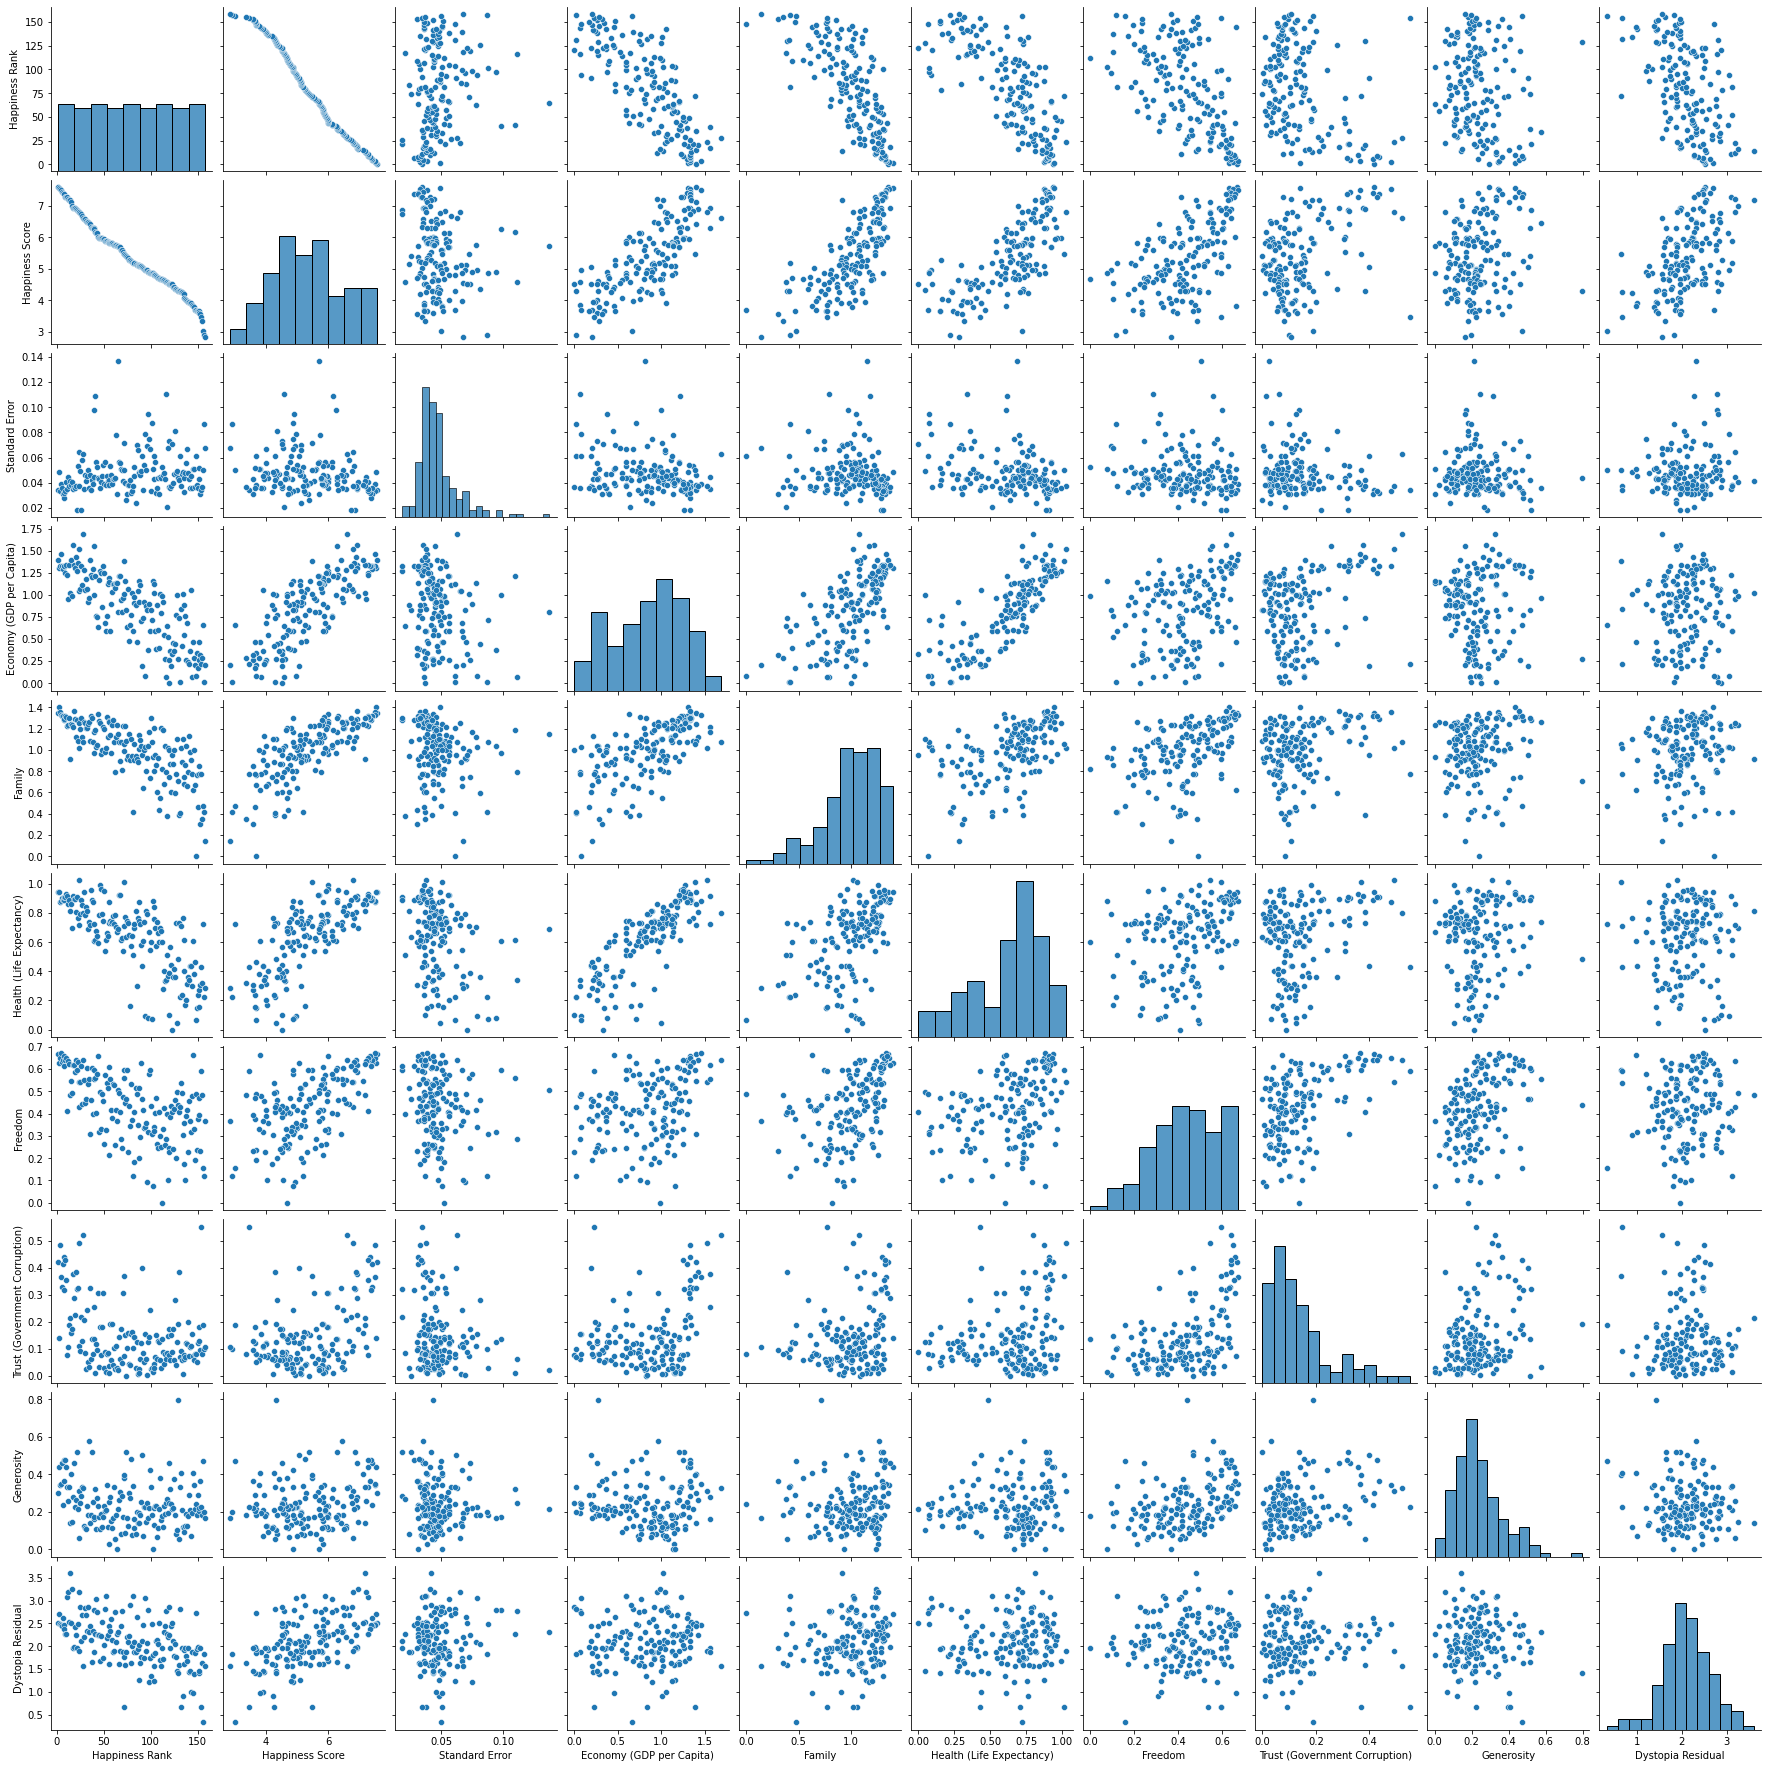

In [16]:
import seaborn as sns
sns.pairplot(df)

In [19]:
import matplotlib.pyplot as plt

Top 10 countries for each attribute

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

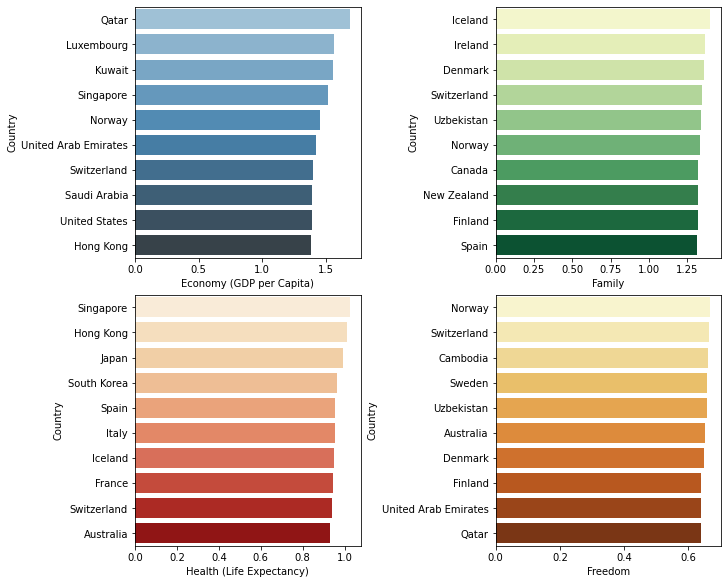

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(10,8))
sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")
sns.barplot(x='Family' ,y='Country',data=df.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')
sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

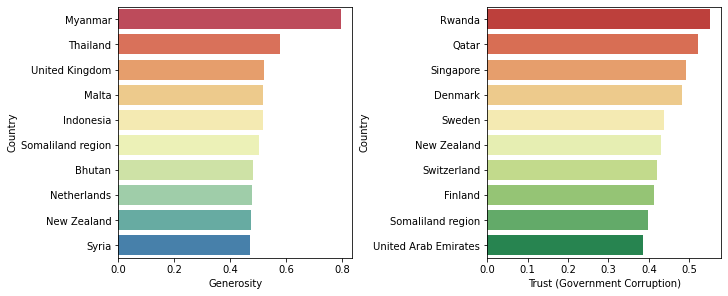

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',data=df.nlargest(10,'Trust (Government Corruption)'),ax=axes[1],palette='RdYlGn')

In [38]:
print('max:',df['Happiness Score'].max())
print('min:',df['Happiness Score'].min())
add=df['Happiness Score'].max()-df['Happiness Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.587
min: 2.839
range difference: 1.583


In [39]:
low=df['Happiness Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Happiness Score'].max())

upper bound of Low grp 4.422
upper bound of Mid grp 6.005
upper bound of High grp max: 7.587


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [60]:
new_df=df.rename(columns={"Happiness Score": "Score"})

In [61]:
new_df

,Country,Region,Happiness Rank,Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Category
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Low
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Low
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Low
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Low
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low


In [63]:
cat=[]
for i in new_df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

new_df['Category']=cat  

In [64]:
color = (new_df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
new_df.style.apply(lambda s: color)

,Country,Region,Happiness Rank,Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Category
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,High
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,High
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,High
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,High
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,High
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550,High
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700,High
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190,High
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,High
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,High


In [66]:
df.loc[df['Country']=='India']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Category
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513,Mid
